<a href="https://colab.research.google.com/github/vishakhakashyap/Project-1/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


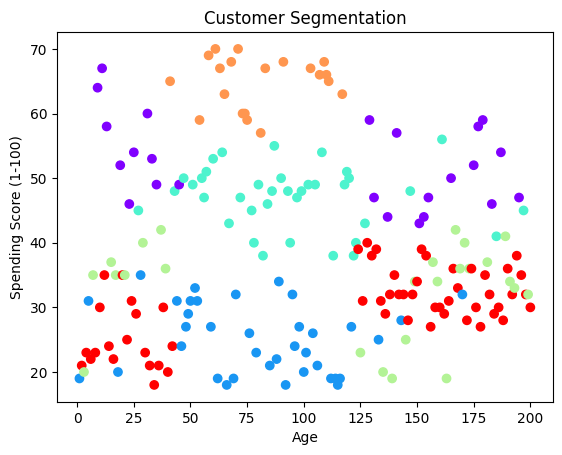

   cluster        Age  Spending Score (1-100)  Annual Income (k$)  CustomerID
0        0  52.458333               14.083333           61.083333          24
1        1  25.135135               51.054054           51.945946          37
2        2  47.081081               45.945946           59.108108          37
3        3  32.880000               16.880000           68.320000          25
4        4  64.850000               49.850000           53.150000          20
5        5  30.175439               82.350877           66.070175          57


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your customer data into a pandas DataFrame
# Replace this with your own data loading mechanism
# For example:
df = pd.read_csv('Mall_Customers.csv')

# Select relevant features for clustering (e.g., spending, frequency)
X = df[['Age', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you can experiment with this)
num_clusters = 6

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(df['CustomerID'], df['Age'], c=df['cluster'], cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.show()


# Analyze cluster characteristics
cluster_summary = df.groupby('cluster').agg({
    'Age': 'mean',
    'Spending Score (1-100)': 'mean',
    'Annual Income (k$)': 'mean',
    'CustomerID': 'count'
}).reset_index()
cluster_summary.rename(columns={'customer_id': 'num_customers'}, inplace=True)

print(cluster_summary)
